<a href="http://landlab.github.io"><img style="float: left" src="../../landlab_header.png"></a>

# Diverse grid classes.

We present the diversity of grid classes available in Landlab, put in their historical context and advantages. Creation and display of each class is indicated by a portion of code which produces the figures indicated in the text.

1. [Introduction](#Introduction)
2. [NetworkModelGrid.](#NetworkModelGrid)
3. [RasterModelGrid.](#RasterModelGrid)
4. [HexModelGrid.](#HexModelGrid)
5. [RadialModelGrid.](#RadialModelGrid)
6. [VoronoiDelaunayGrid.](#VoronoiDelaunayGrid)
7. [FramedVoronoiGrid.](#FramedVoronoiGrid)

<img src="media/Grids1.png"/><br>
**Fig. 1.** Geometry and topology of grid elements on diverse Landlab grids ([Hobley et al., 2017](https://doi.org/10.5194/esurf-5-21-2017)).


## 1. <a name="Introduction">Introduction</a>
Modeling can be used to test the impact of a process on an object and its properties through time and space. For instance, we can model the impact of mass wasting (the process) on the earth surface (the object) and its topographic elevation (the property). To do this, we need to represent the ***surface*** and its elevation. We could represent this property by a continuous 2-D function, such as a sinusoidal or a polynomial envelope. This is not always simple and practicable (see [Gerya, 2010, p. 37](https://doi.org/10.1017/9781316534243)). Some processes are simulated by partial differential equations. These equations can't always be solved analytically. That roughly means that they can't be easily solved the way x^2 = y + 3 * 3 can be solved (x being the property value before the impact of the process, y the value after the impact of the process). We usually solve these equations numerically. This requires ***discretizing*** the values of the surface properties.

To discretize property values, we represent the surface in a ***grid*** of small ***cells*** (also called a mesh) and affect to each cell a value for the property. The value is considered as an average over the cell. This representation is called ***tessellation***. It is also called tiling if the cells are regular. A tessellated space only contain cells that don't overlap with each other, and that don't have a gap between each other.

We can also represent the surface in a spatial grid of ***nodes*** and affect a property value to each of them. In this case, the surface is also tessellated in cells. A node is then the single point located at the center of each cell. Two nodes can have a ***link***. Using nodes and links is convenient to represent the fluxes or moves between cells, or to ease computation, for instance of gradients.

## <a name="NetworkModelGrid">2. NetworkModelGrid</a>
Board games (review in [Depaulis, 2020](https://doi.org/10.2478/bgs-2020-0007)) are probably the oldest activity consisting in representing surfaces and properties. These games consist in moving pieces from a position to another on a surface, either to win a race or to win a war. The set of positions is limited, and the moves follow a set of rules: pieces can't go where they want and the way they want. Then the simplest way to represent the surface and its rule is using a network grid. Positions are represented by points, also called nodes, and the possible paths are represented by links. The ancient board of the alquerque game, the ancestor of checkers, is an illustration of this class of grids. 

In Landlab, this class is implemented by the ***NetworkModelGrid***. A regular grid instance of this class is shown **Fig. 2**. Note that the implementation of the NetworkGrid allows irregular networks, where links are of variable lengths and directions. The NetworkModelGrid class is adapted for surfaces subject to fluxes of particles or agents which are constrained by the river or the road network (See [the network_sediment_transporter notebook](../network_sediment_transporter/network_sediment_transporter.ipynb)). <br>

Fig. 2A. Node view.


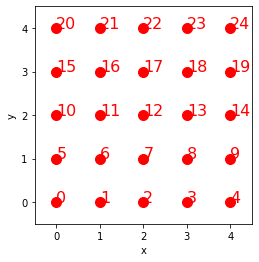

Fig. 2B. Link view. The grid reproduces an alquerque board game.


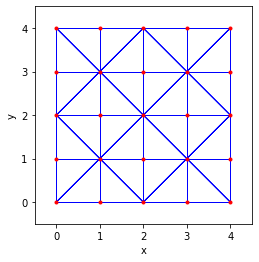

In [1]:
# Code to create and display a NetworkModelGrid similar to the alquerque board

# Libraries
import numpy as np
from landlab import NetworkModelGrid
import matplotlib.pyplot as plt
from landlab.plot import graph

# nodes
x_n = 5 # number of nodes on a vertical line
y_n = 5 # number of nodes on a horizontal line
n = x_n * y_n # number of nodes
# x-coordinates of nodes
x = np.array([])
for i in range(x_n): x = np.append(x, np.arange(x_n, dtype=float))
# y-coordinates of nodes
y = np.sort(np.repeat(np.arange(y_n, dtype=float), y_n))

# links
# horizontal links
lh = []
for j in range(y_n): lh += [(i + j * y_n, i + j * y_n + 1) for i in range(x_n - 1)] 
# vertical
lv = [(i, i + y_n) for i in range(n - y_n)] 
# diagonal 1
ld1 = []
for j in [0, 2]: ld1 += [(i + j * y_n, i + (j + 1) * y_n + 1) for i in [0, 2]] 
for j in [0, 2]: ld1 += [(5 + 1 + i + j * y_n, 5 + 1 + i + (j + 1) * y_n + 1) for i in [0, 2]] 
# diagonal 2
ld2 = []
for j in [0, 2]: ld2 += [(2 + i + j * y_n, 2 + 8 + i + j * y_n) for i in [0, 2]] 
links = tuple(lh + lv + ld1 + ld2)

# grid
params = {"yx_of_node": (y, x),
    "links": links,
    "xy_axis_units": ""}

grid  = NetworkModelGrid(**params) # grid creation


print("\033[1mFig. 2A.\033[0m Node view.")
graph.plot_graph(grid, at="node") # display
plt.show()
print("\033[1mFig. 2B.\033[0m Link view. The grid reproduces an alquerque board game.")
graph.plot_graph(grid, at="link", with_id=False) # display

## <a name="RasterModelGrid">3. RasterModelGrid</a>

Board games can be more complex than checkers. For instance, chess splits pieces in a diverse family. Their members don't follow the same rules to move, and these rules depend on the color property value of their initial position. The network grid has an inconvenient for this use, because visibility of the property values can be hindered by the pieces. Players rather use a grid of squares. Square and rectangular grids are implemented by the ***RasterModelGrid*** (**Fig. 3**). Note that NetworkModelGrid and RasterModelGrid can be combined (see the [run_network_generator_OpenTopoDEM notebook](../network_sediment_transporter/run_network_generator_OpenTopoDEM.ipynb)).

Square grids are the most commonly used grids in modeling. Most probably, you will prototype your model with a square grid. Still, many clues, such as the chinese character for a field, 田, point to a justification of the square grid dating back to the beginning of agriculture and land and work division. Square grids are practical because many mathematical operations on them are simple. Still, links of square grids can complexify the computation of fluxes between cells, because these links can be orthogonal to faces and ***diagonal***. Presently, with efficient algorithms and massive computer power, other classes of grids can have easy access to practical coordinate systems, resampling, combination of several grids. 

Then, the RasterModelGrid should be preferred when the model use or produce rasters of remote sensing data or digital elevation models, which would be too time-expensive to convert in another class of grids (see the [reading_dem_into_landlab notebook](../reading_dem_into_landlab/reading_dem_into_landlab.ipynb) and the sections 1. to 3. using BMI Opentopography to download a SRTM DEM and convert it into a grid, within the [run_network_generator_OpenTopoDEM notebook](../network_sediment_transporter/run_network_generator_OpenTopoDEM.ipynb)).

Fig. 3A. Cell view with color property. The grid reproduces a chess board.


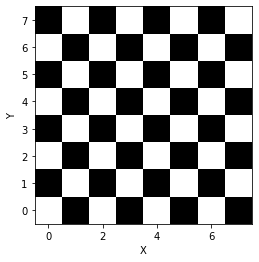

Fig. 3B.  Node view.


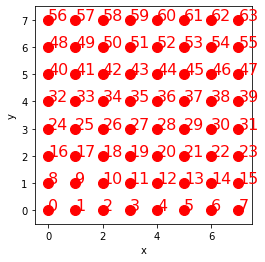

Fig. 3C.  Link view. Note that diagonal links are not represented because of a bug of the method.


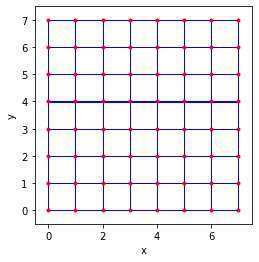

In [2]:
# Code to create and display a RasterModelGrid similar to a chessboard

# Libraries
import numpy as np
from landlab import RasterModelGrid
from landlab.plot import graph
from landlab import imshow_grid

x_n = y_n = 8 # number of nodes on a horizontal and a vertical line
n = x_n * y_n # number of nodes

# grid creation. 
# Shape is a tuple of the number of rows y_n and the number of columns x_n.
grid = RasterModelGrid(shape=(y_n, x_n)) 

# creation of the color property and affectation of values for each node, using their id = i + j
color_array = np.array([(i+j) % 2 for i in range(x_n) for j in range(y_n)])
color = grid.add_field("color", color_array, at="node", dbtype=float)

# display
print("\033[1mFig. 3A.\033[0m Cell view with color property. The grid reproduces a chess board.")
imshow_grid(grid, 'color', cmap ="Greys", limits=(0, 1), allow_colorbar=False)
plt.show()

print("\033[1mFig. 3B.\033[0m  Node view.")
graph.plot_graph(grid, at="node", with_id=True)  # with_id=True allows the display of node ids

print("\033[1mFig. 3C.\033[0m  Link view. Note that diagonal links are not represented because of a bug of the method.")
graph.plot_graph(grid, at="link", with_id=False) 

## <a name="HexModelGrid">4. HexModelGrid</a>

The most promissing type of regular grid is hexagonal like an Agon board game. It is implemented by the ***HexModelGrid*** (**Fig. 3**). This type of grid presents some advantages for modeling ([Birch et al., 2007](https://doi.org/10.1016/j.ecolmodel.2007.03.041) and [H3 by Uber](https://h3geo.org/). All links are orthogonal, which is favorable to study connections, least expensive paths, and fluxes. Hexagons have properties close to circles (tesselation can't use circles because of the gaps or overlapping between cells). They are adapted to modeling on large areas of a planet, because they better fit curved surfaces. They also have a small perimeter/area ratio, which reduces the edge effects of the grid. And natural patterns are usually more curvilinear than rectilinear. Hexagons help to visually spot these patterns without rectilinear modeling artefacts.

The HexModelGrid is an interesting compromise between RasterModelGrid and irregular grids. The hex grid is used in the [landlab-fault-scarp](../fault_scarp/landlab-fault-scarp.ipynb) and the [listric_kinematic_extender notebooks](../tectonics/listric_kinematic_extender.ipynb).

**Comment**: Another type of regular grid is the triangular grid, which is not implemented in Landlab. The applications of triangular grids in geomodeling might be limited. Contrary to square and hex grids, cells are oriented in two directions. Similar to the square grids, links can also be diagonal. 

Fig. 4A. Cell view with color property. The grid reproduce an agon game board.


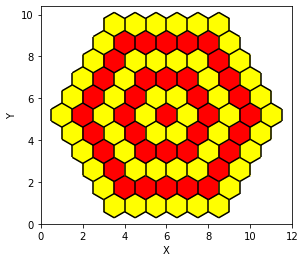

Fig. 4B. Cell and node (dots and crosses) view. The boundary nodes don't have cells.


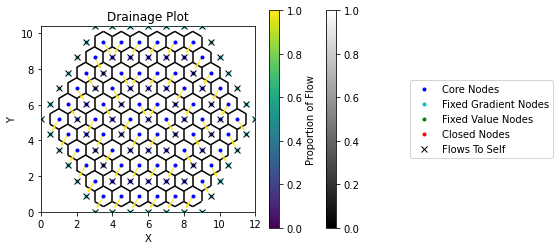

Fig. 4C.  Node view.


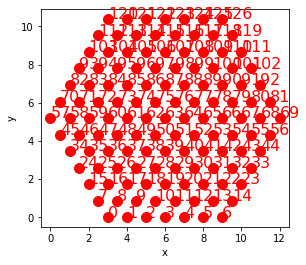

Fig. 4D.  Link view.


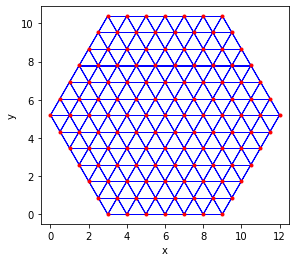

In [3]:
# Code to create and display a HexModelGrid

# Libraries
import numpy as np
from landlab import HexModelGrid
from landlab.components import FlowDirectorSteepest
from landlab.plot import graph
from landlab import imshow_grid
from landlab.plot.drainage_plot import drainage_plot

x_n = 7 # number of nodes at the bottom edge of the hexagon
y_n = 13 # number of nodes at the left edge of the hexagon

# Shape is a tuple of the number of rows y_n and the number of columns x_n.
grid = HexModelGrid((y_n, x_n), node_layout="hex")
n = grid.number_of_nodes # number of nodes

# creation of the color property and affectation to each node by using their ids (8, 16, etc ...)
color_array = np.ones(n)
for i in [17, 18, 19, 20, 21, 
          26, 31,
         36, 38, 39, 40, 42,
         47, 49, 52, 54,
         59, 61, 63, 65, 67,
         72, 74, 77, 79,
         84, 86, 87, 88, 90,
         95, 100,
         105, 106, 107, 108, 109]:
    color_array[i] = 0.
color = grid.add_field("color", color_array, at="node", dbtype=float)
grid.at_node["color"][grid.boundary_nodes] = 0

# construction of a drainage network based on the color property values
dir = FlowDirectorSteepest(grid, surface="color")
dir.run_one_step()

# display
print("\033[1mFig. 4A.\033[0m Cell view with color property. The grid reproduce an agon game board.")
imshow_grid(grid, 'color', cmap ="autumn", limits=(0, 1), allow_colorbar=False, show_elements=True) 
                            # show_elements allows to draw cell contour, except for RasterModelGrid
plt.show()

print("\033[1mFig. 4B.\033[0m Cell and node (dots and crosses) view. The boundary nodes don't have cells.")
drainage_plot(grid, surface="color")
imshow_grid(grid, 'color', cmap ="Greys", limits=(0, 100), allow_colorbar=False, show_elements=True)
plt.show()

print("\033[1mFig. 4C.\033[0m  Node view.")
graph.plot_graph(grid, at="node", with_id=True)
plt.show()

print("\033[1mFig. 4D.\033[0m  Link view.")
graph.plot_graph(grid, at="link", with_id=False)

## <a name="RadialModelGrid">5. RadialModelGrid</a>
While HexModelGrid helps to improve modeling of natural objects, it's still not the panacea to investigate circular objects. Radial grids can be used to model the uplift and erosion of a volcano. It also can be used to model a cross-section of a cooling planetesimal. Radial grids can be structured as a series of rings of quadrilaterals, surrounding a circular set of triangles, with a size of cells varying with the distance from the center. In Landlab, radial grids are implemented by the ***RadialModelGrid*** (**Fig. 5.**) , which consists of rings of hexagonal cells, with a central heptagon cell. Cell areas are similar but their shapes differ according to their position.

Fig. 5A. Cell view with color property.


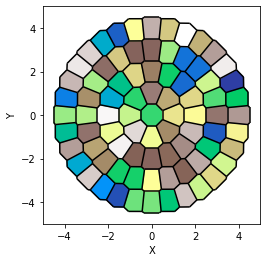

Fig. 5B. Cell and node (dots and crosses) view. The boundary nodes don't have cells.


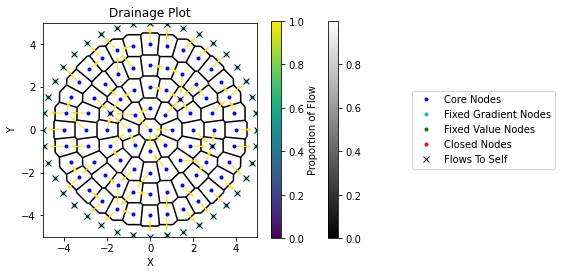

Fig. 5C.  Node view.


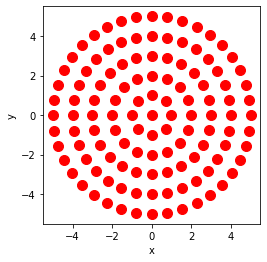

Fig. 5D.  Link view.


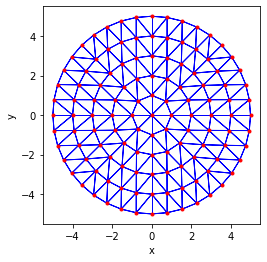

In [4]:
# Code to create and display a RadialModelGrid

# Libraries
import numpy as np
from landlab import RadialModelGrid
from landlab.components import FlowDirectorSteepest
from landlab.plot import graph
from landlab import imshow_grid
from landlab.plot.drainage_plot import drainage_plot

rings_n = 5 # number of rings
outer_nodes_n = 8 # number of nodes on the outer boundary of the grid

grid = RadialModelGrid(rings_n, outer_nodes_n) # grid creation
n = grid.number_of_nodes # number of nodes

# creation of the color property
# generation of random colors and set the boundary colors to 0
random_generator = (np.random.Generator(np.random.PCG64(200)))
color_array = random_generator.random(n)
color_array[grid.boundary_nodes] = 0

color = grid.add_field("color", color_array, at="node", dbtype=float)

# construction of a drainage network based on the color property values
dir = FlowDirectorSteepest(grid, surface="color")
dir.run_one_step()

# display
print("\033[1mFig. 5A.\033[0m Cell view with color property.")
imshow_grid(grid, 'color', cmap ="terrain", limits=(0, 1), allow_colorbar=False, show_elements=True)
plt.show()

print("\033[1mFig. 5B.\033[0m Cell and node (dots and crosses) view. The boundary nodes don't have cells.")
drainage_plot(grid, surface="color")
imshow_grid(grid, 'color', cmap ="Greys", limits=(0, 100), allow_colorbar=False, show_elements=True)
plt.show()

print("\033[1mFig. 5C.\033[0m  Node view.")
graph.plot_graph(grid, at="node", with_id=False) 

print("\033[1mFig. 5D.\033[0m  Link view.")
graph.plot_graph(grid, at="link", with_id=False) 

## <a name="VoronoiDelaunayGrid">6. VoronoiDelaunayGrid</a>
Irregular grids (**Fig. 6-7**) can be advantageous to model earth surface processes [Braun & Sambridge, 1997](https://doi.org/10.1046/j.1365-2117.1997.00030.x). But they are still not commonly adopted. These grids are constructed from nodes that are not regularly organized on the surface. Their position can be random or link to a point of interest, for instance weather stations. Then, we construct Voronoi cells for the set of nodes. The Voronoi construction aims to make each node the closest node for all the points within its cell. Then, the links between the nodes are constructed following a Delaunay triangulation. This triangulation optimizes the construction so that no link cross another link and makes a network of triangles which edges are the links.

The landscapes generated using irregular grids appear more natural because of the absence of regularity. The drainage network forms without favoring specific directions, even when close to the grid boundaries, and has roughly similar patterns and properties whatever the resolution. Irregular grids can also tackle geomorphological objects with complex geometries.

In Landlab, irregular grids are implemented with the ***VoronoiDelaunayGrid*** (**Fig. 6**) and the ***[FramedVoronoiGrid](#FramedVoronoiGrid)***. In the VoronoiDelaunayGrid, the user has to input x-y coordinates of nodes. To carry out flow direction, the user has also to set up the boundary nodes.

Fig. 6A. Cell view with color property.


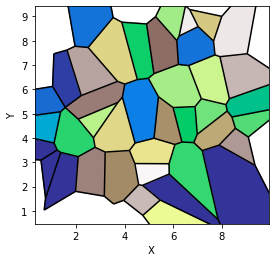

Fig. 6B. Cell and node (dots and crosses) view. The boundary nodes don't have cells.


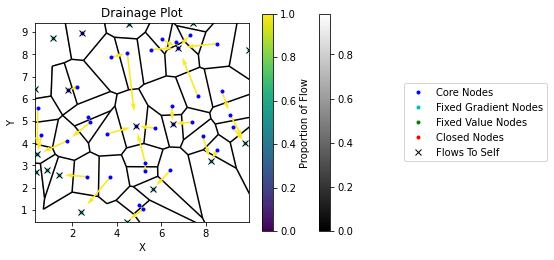

Fig. 6C.  Node view.


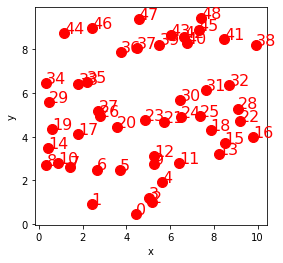

Fig. 6D.  Link view.


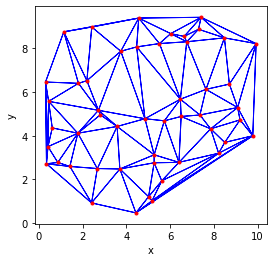

In [5]:
# Code to create and display a VoronoiDelaunayGrid

# Libraries
import numpy as np
from landlab import VoronoiDelaunayGrid
from landlab.components import FlowDirectorSteepest
from landlab.plot import graph
from landlab import imshow_grid
from landlab.plot.drainage_plot import drainage_plot

n = 49 # number of nodes
xy_lengths = [10, 10] # dimensions of the grid

# generators of random numbers for x-y coordinates
seeds = [200, 500]
xy_random_generator = (np.random.Generator(np.random.PCG64(seeds[0])),
                np.random.Generator(np.random.PCG64(seeds[1])))
# generation of x-y coordinates
x = xy_random_generator[0].random(n) * xy_lengths[0]
y =  xy_random_generator[1].random(n) * xy_lengths[1]

grid = VoronoiDelaunayGrid(x=x, y=y) # grid creation

# Manual setting of the boundary nodes. 
# Boundary is automatically set for other type of grids, except for the NetworkModelGrid
boundary_nodes = [0, 1, 4, 7, 10, 13, 14]
grid.status_at_node[boundary_nodes] = grid.BC_NODE_IS_FIXED_VALUE

# creation of the color property
# generation of random colors and set the boundary colors to 0
color_array = xy_random_generator[0].random(n)
color = grid.add_field("color", color_array, at="node")
color[boundary_nodes] = 0.

# construction of a drainage network based on the color property values
dir = FlowDirectorSteepest(grid, surface="color")
dir.run_one_step()

# display
print("\033[1mFig. 6A.\033[0m Cell view with color property.")
imshow_grid(grid, 'color', cmap ="terrain", limits=(0, 1), allow_colorbar=False, show_elements=True)
plt.show()

print("\033[1mFig. 6B.\033[0m Cell and node (dots and crosses) view. The boundary nodes don't have cells.")
drainage_plot(grid, surface="color")
imshow_grid(grid, 'color', cmap ="Greys", limits=(0, 100), allow_colorbar=False, show_elements=True)
plt.show()

print("\033[1mFig. 6C.\033[0m  Node view.")
graph.plot_graph(grid, at="node", with_id=True) 

print("\033[1mFig. 6D.\033[0m  Link view.")
graph.plot_graph(grid, at="link", with_id=False) 

## <a name="FramedVoronoiGrid">7. FramedVoronoiGrid</a>
The FramedVoronoiGrid (**Fig. 7**) is an elaborated version of the VoronoiDelaunayGrid. The user input parameters to automatically calculate the positions of the nodes. The boundary nodes are automatically fixed, in a not random way. The core nodes are first positioned in a regular, rectangular pattern, and then moved by a random distance in such a way that a minimal distance between nodes is respected. This minimal distance is convenient when we have to run diffusion or river incision processes on the grid, which can become unstable for two small distances between nodes (depending on the timestep of the run).

In [8]:
# Code to create and display a FramedVoronoiGrid

# Libraries
import numpy as np
from landlab import FramedVoronoiGrid
from landlab.components import FlowDirectorSteepest
from landlab.plot import graph
from landlab import imshow_grid
from landlab.plot.drainage_plot import drainage_plot

x_n = y_n = 7 # number of nodes on a horizontal and a vertical line
n = x_n * y_n # number of nodes

params = {"shape": (x_n, y_n),
          "xy_spacing": (1., 1.), # starting distance between nodes
          "xy_min_spacing": (0.25, 0.25), # minimal x-y distance between nodes
          "random_seed": False, # set to False for reproducibility. 
              # Set to True if you want the moves around the starting positions fully random
          "seed": (200, 500), # if random_seed == False, these seeds are 
              #used to generate the random moves around the starting positions
          "xy_axis_units": "m"}

grid = FramedVoronoiGrid(**params) # grid creation

# creation of the color property
# generation of random colors and set the boundary colors to 0
random_generator = np.random.Generator(np.random.PCG64(200))
color_array = random_generator.random(n)
color_array[grid.boundary_nodes] = 0
color = grid.add_field("color", color_array, at="node")

# construction of a drainage network based on the color property values
dir = FlowDirectorSteepest(grid, surface="color")
dir.run_one_step()

# display
print("\033[1mFig. 6A.\033[0m Cell view with color property.")
imshow_grid(grid, 'color', cmap ="terrain", limits=(0, 1), allow_colorbar=False, show_elements=True)
plt.show()

print("\033[1mFig. 6B.\033[0m Cell and node (dots and crosses) view. The boundary nodes don't have cells.")
drainage_plot(grid, surface="color")
imshow_grid(grid, 'color', cmap ="Greys", limits=(0, 100), allow_colorbar=False, show_elements=True)
plt.show()

print("\033[1mFig. 6C.\033[0m  Node view.")
graph.plot_graph(grid, at="node", with_id=False) 

print("\033[1mFig. 6D.\033[0m  Link view.")
graph.plot_graph(grid, at="link", with_id=False) 

ImportError: cannot import name 'FramedVoronoiGrid' from 'landlab' (/opt/tljh/user/envs/csdms/lib/python3.9/site-packages/landlab/__init__.py)

Author: Sebastien Lenard <br>
Date: 2022, Aug.